# Wildfire Intensity and Frequency Predictor
## Part 4: Classification metrics
<br>
<br>

> Mariam Javed <br>
> Wayne Chan <br>
> Shawn Syms 

<a name="contents"></a>
## Contents

* <a href="#imports">Imports</a>
* <a href="#classification-metrics">Classification metrics</a>
> * <a href="#setup">Setup</a>
> * <a href="#classification-report">Classification report and confusion matrix</a>
> * <a href="#roc-curve">ROC curve with AUC</a>

<a name="imports"></a>
## Imports

In [1]:
import numpy as np
import pandas as pd

# presentation and visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

Using TensorFlow backend.


<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="classification-metrics"></a>
## Classification Metrics

<a name="setup"></a>
### Setup

In [39]:
preds = model.predict_classes(X_test_sc) #this was completed with model defined as the neural network model from notebook 3

In [50]:
np.savetxt('firepreds.csv', preds, delimiter=',')

In [80]:
dfcm = pd.DataFrame(preds, columns = ['prediction'])

In [76]:
y = df['fire_size_class']

# Re-ran train test split to to get pre-encoded y_test results for confusion matrix and classification report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
y_test

145578     1
1215152    1
629996     2
1144799    1
649700     4
          ..
1735407    0
1419112    0
1127160    1
1373917    0
815929     1
Name: fire_size_class, Length: 376093, dtype: int32

In [77]:
type(y_test)

pandas.core.series.Series

In [78]:
y_test = pd.Series.reset_index(y_test, drop = True)

In [79]:
y_test

0         1
1         1
2         2
3         1
4         4
         ..
376088    0
376089    0
376090    1
376091    0
376092    1
Name: fire_size_class, Length: 376093, dtype: int32

In [81]:
dfcm['actual'] = y_test

In [82]:
dfcm

,prediction,actual
0,0,1
1,0,1
2,1,2
3,0,1
4,1,4
...,...,...
376088,1,0
376089,1,0
376090,1,1
376091,0,0


In [89]:
dfcm.to_csv('firepreds_act.csv', index = False)

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="classification-report"></a>
### Classification report and confusion matrix

In [129]:
print(confusion_matrix(y_test, preds))

[[ 81309  52075      0      0      0      0      0]
 [ 36712 151163      0      0      0      0      0]
 [  5258  38757      0      0      0      0      0]
 [  1304   4382      0      0      0      0      0]
 [   928   1893      0      0      0      0      0]
 [   808    749      0      0      0      0      0]
 [   476    279      0      0      0      0      0]]


In [139]:
print(classification_report(y_test, preds, digits=3, zero_division = 0))

              precision    recall  f1-score   support

           0      0.641     0.610     0.625    133384
           1      0.606     0.805     0.692    187875
           2      0.000     0.000     0.000     44015
           3      0.000     0.000     0.000      5686
           4      0.000     0.000     0.000      2821
           5      0.000     0.000     0.000      1557
           6      0.000     0.000     0.000       755

    accuracy                          0.618    376093
   macro avg      0.178     0.202     0.188    376093
weighted avg      0.530     0.618     0.567    376093



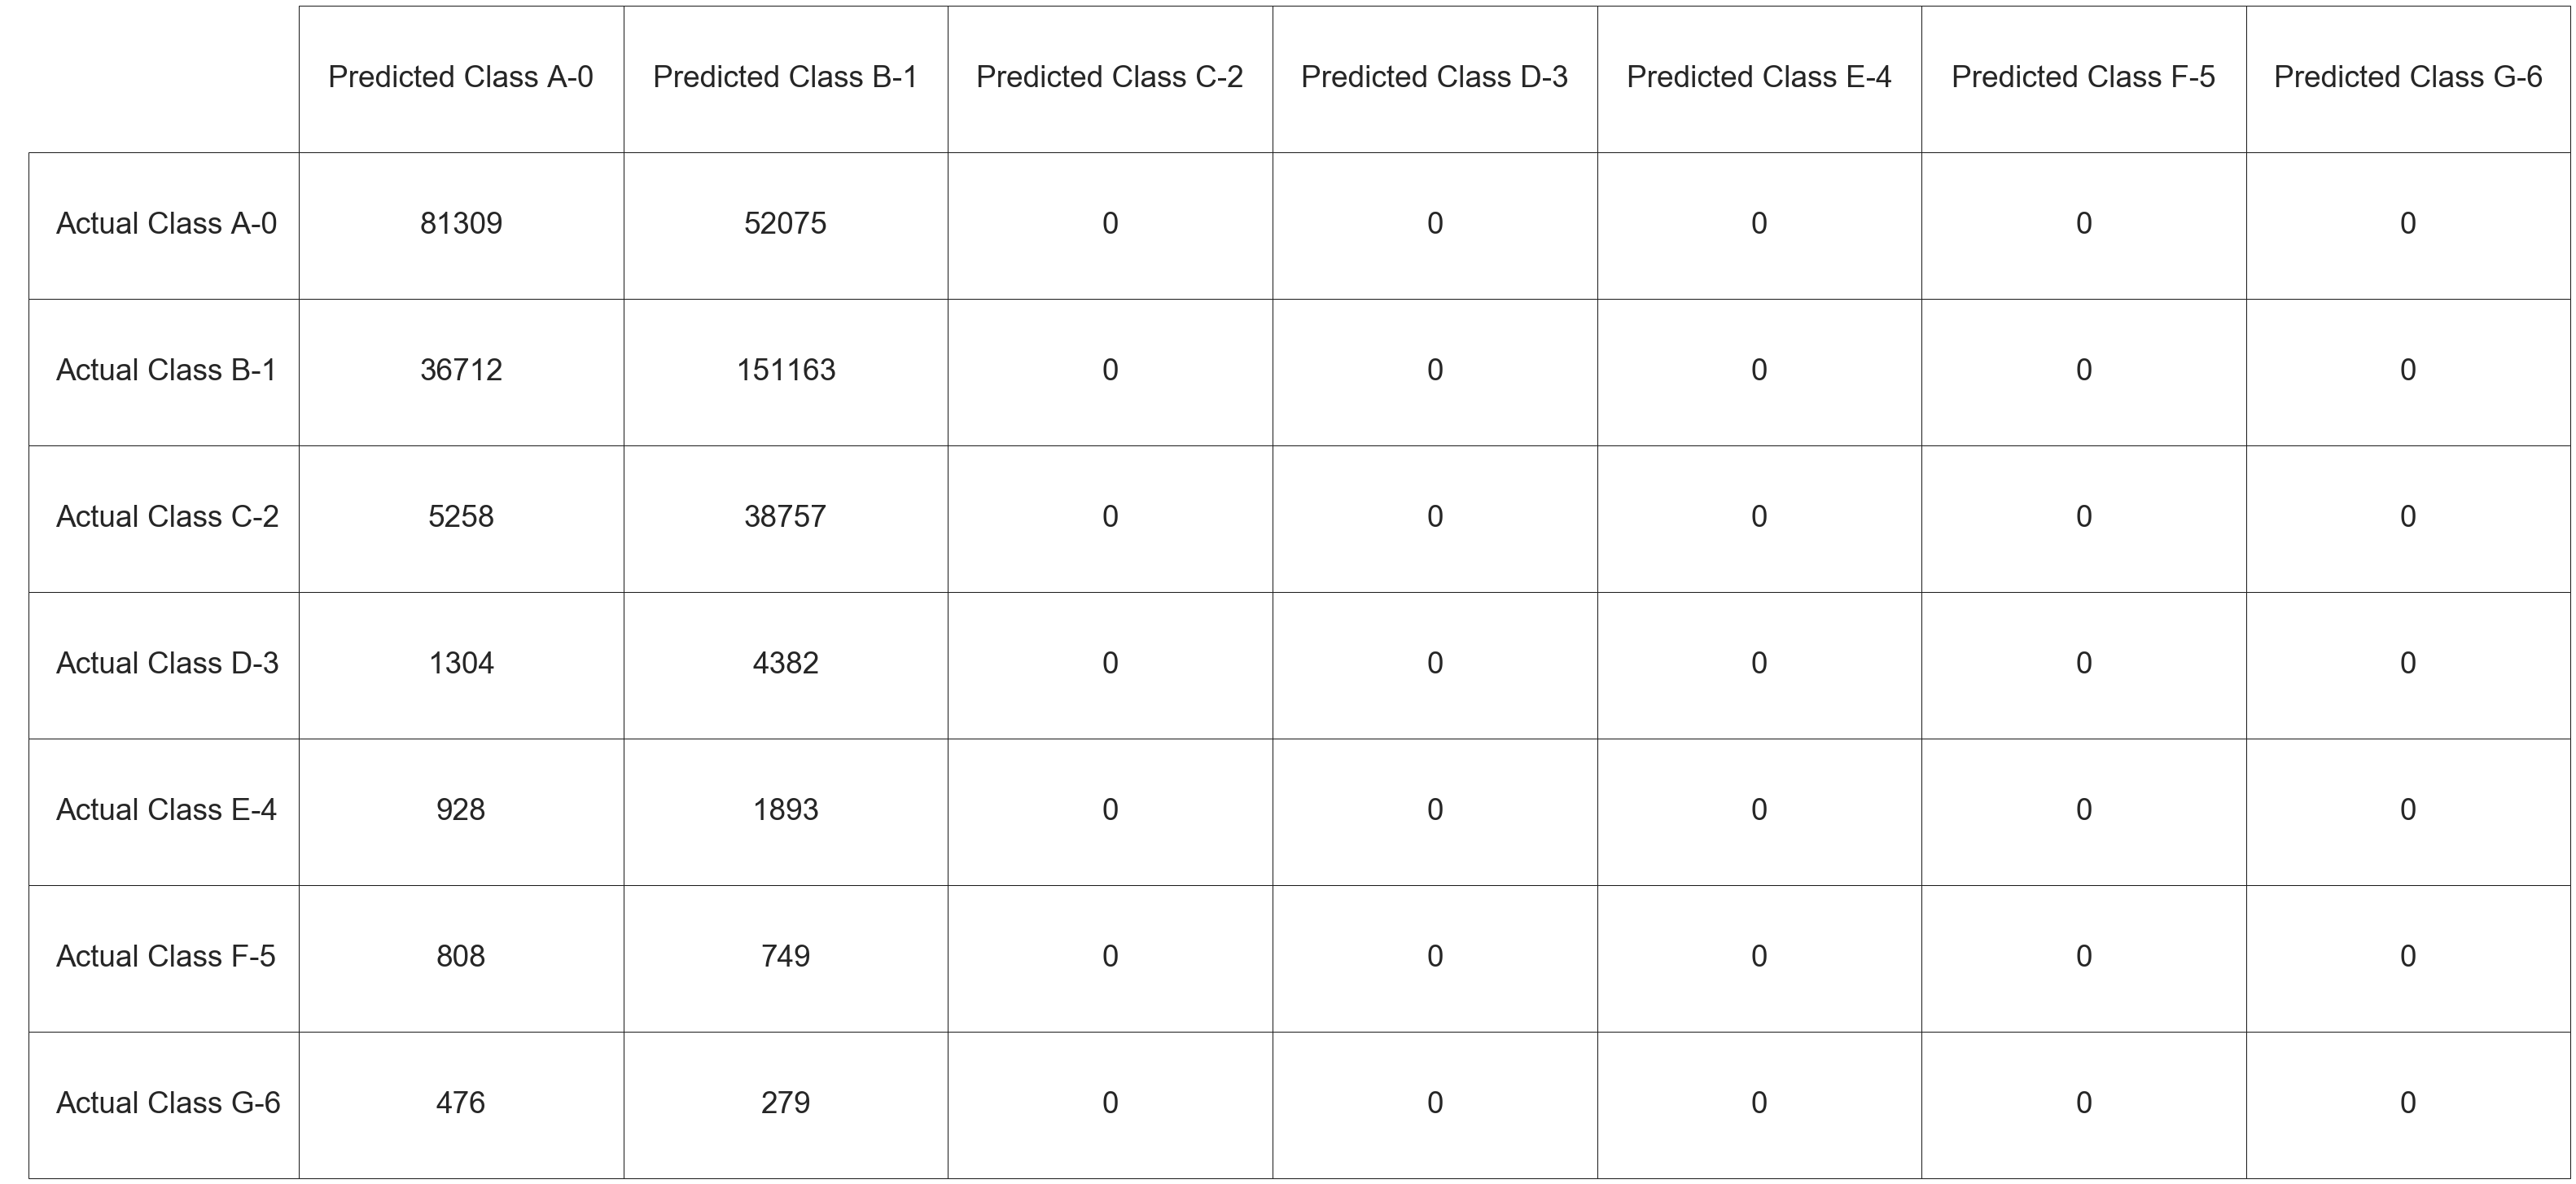

In [116]:
plt.figure(figsize=(10,3))

table = plt.table(cellText = np.array(confusion_matrix(y_test, preds)), 
                  colLabels = [
                      'Predicted Class A-0', 
                      'Predicted Class B-1', 
                      'Predicted Class C-2', 
                      'Predicted Class D-3', 
                      'Predicted Class E-4', 
                      'Predicted Class F-5', 
                      'Predicted Class G-6'],
                 rowLabels = [
                      'Actual Class A-0', 
                      'Actual Class B-1', 
                      'Actual Class C-2', 
                      'Actual Class D-3', 
                      'Actual Class E-4', 
                      'Actual Class F-5', 
                      'Actual Class G-6'],
                  loc = 'center',
                  cellLoc= 'center'
                 )
table.set_fontsize(40)
table.scale(5,15)
plt.axis('off')
table;

<div style="text-align: right">(<a href="#contents">home</a>) </div>

<a name="roc-curve"></a>
### ROC curve with AUC

In [90]:
probs = model.predict(X_test_sc) #this was completed with model defined as the neural network model from notebook 3

In [97]:
np.savetxt('fireprobs.csv', probs, delimiter=',') #exported file is 65MB so we could not easily transfer

In [131]:
probs

array([[6.7536777e-01, 2.4673356e-01, 3.9360560e-02, ..., 1.1485270e-02,
        7.8901695e-03, 5.4888390e-03],
       [5.1580787e-01, 3.9884067e-01, 5.7028972e-02, ..., 8.1331786e-03,
        4.8746644e-03, 2.6231494e-03],
       [1.0997933e-01, 5.7565582e-01, 2.4224469e-01, ..., 2.1059556e-02,
        7.8237532e-03, 1.4575310e-03],
       ...,
       [4.4174960e-01, 4.5484000e-01, 7.4218519e-02, ..., 8.5587064e-03,
        4.6812356e-03, 2.4113902e-03],
       [7.9211307e-01, 1.7383692e-01, 1.6352160e-02, ..., 5.4338477e-03,
        3.5565291e-03, 2.0473008e-03],
       [2.7899392e-02, 7.1032500e-01, 2.4336545e-01, ..., 2.9599033e-03,
        3.9014741e-04, 9.4949555e-06]], dtype=float32)

In [143]:
dfprobs = pd.DataFrame(probs, columns = ['0', '1', '2', '3', '4', '5', '6'])

In [144]:
dfprobs

,0,1,2,3,4,5,6
0,0.675368,0.246734,0.039361,0.013674,0.011485,0.007890,0.005489
1,0.515808,0.398841,0.057029,0.012691,0.008133,0.004875,0.002623
2,0.109979,0.575656,0.242245,0.041779,0.021060,0.007824,0.001458
3,0.496223,0.415619,0.060145,0.012772,0.008022,0.004673,0.002546
4,0.165473,0.573088,0.198050,0.034821,0.018389,0.008102,0.002078
...,...,...,...,...,...,...,...
376088,0.389809,0.425638,0.126863,0.024963,0.016541,0.010515,0.005672
376089,0.343260,0.602245,0.052160,0.001713,0.000510,0.000097,0.000015
376090,0.441750,0.454840,0.074219,0.013541,0.008559,0.004681,0.002411
376091,0.792113,0.173837,0.016352,0.006660,0.005434,0.003557,0.002047


In [145]:
dfprobs['actual'] = dfcm['actual']

In [152]:
probdummies

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
376088,1,0,0,0,0,0,0
376089,1,0,0,0,0,0,0
376090,0,1,0,0,0,0,0
376091,1,0,0,0,0,0,0


In [153]:
probdummies = pd.get_dummies(dfprobs['actual'])
dfprobs['act_0'] = probdummies[0]
dfprobs['act_1'] = probdummies[1]
dfprobs['act_2'] = probdummies[2]
dfprobs['act_3'] = probdummies[3]
dfprobs['act_4'] = probdummies[4]
dfprobs['act_5'] = probdummies[5]
dfprobs['act_6'] = probdummies[6]

In [154]:
dfprobs

,0,1,2,3,4,5,6,actual,act_0,act_1,act_2,act_3,act_4,act_5,act_6
0,0.675368,0.246734,0.039361,0.013674,0.011485,0.007890,0.005489,1,0,1,0,0,0,0,0
1,0.515808,0.398841,0.057029,0.012691,0.008133,0.004875,0.002623,1,0,1,0,0,0,0,0
2,0.109979,0.575656,0.242245,0.041779,0.021060,0.007824,0.001458,2,0,0,1,0,0,0,0
3,0.496223,0.415619,0.060145,0.012772,0.008022,0.004673,0.002546,1,0,1,0,0,0,0,0
4,0.165473,0.573088,0.198050,0.034821,0.018389,0.008102,0.002078,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376088,0.389809,0.425638,0.126863,0.024963,0.016541,0.010515,0.005672,0,1,0,0,0,0,0,0
376089,0.343260,0.602245,0.052160,0.001713,0.000510,0.000097,0.000015,0,1,0,0,0,0,0,0
376090,0.441750,0.454840,0.074219,0.013541,0.008559,0.004681,0.002411,1,0,1,0,0,0,0,0
376091,0.792113,0.173837,0.016352,0.006660,0.005434,0.003557,0.002047,0,1,0,0,0,0,0,0


In [159]:
print(f"ROC AUC score for Class 0-A is {roc_auc_score(dfprobs['act_0'], dfprobs['0'])}")
print(f"ROC AUC score for Class 1-B is {roc_auc_score(dfprobs['act_1'], dfprobs['1'])}")
print(f"ROC AUC score for Class 2-C is {roc_auc_score(dfprobs['act_2'], dfprobs['2'])}")
print(f"ROC AUC score for Class 3-D is {roc_auc_score(dfprobs['act_3'], dfprobs['3'])}")
print(f"ROC AUC score for Class 4-E is {roc_auc_score(dfprobs['act_4'], dfprobs['4'])}")
print(f"ROC AUC score for Class 5-F is {roc_auc_score(dfprobs['act_5'], dfprobs['5'])}")
print(f"ROC AUC score for Class 6-G is {roc_auc_score(dfprobs['act_6'], dfprobs['6'])}")

ROC AUC score for Class 0-A is 0.7999518658182749
ROC AUC score for Class 1-B is 0.70175617507613
ROC AUC score for Class 2-C is 0.7489268515936458
ROC AUC score for Class 3-D is 0.7690975228272752
ROC AUC score for Class 4-E is 0.8071044408199568
ROC AUC score for Class 5-F is 0.8569817979635627
ROC AUC score for Class 6-G is 0.9114642487888797


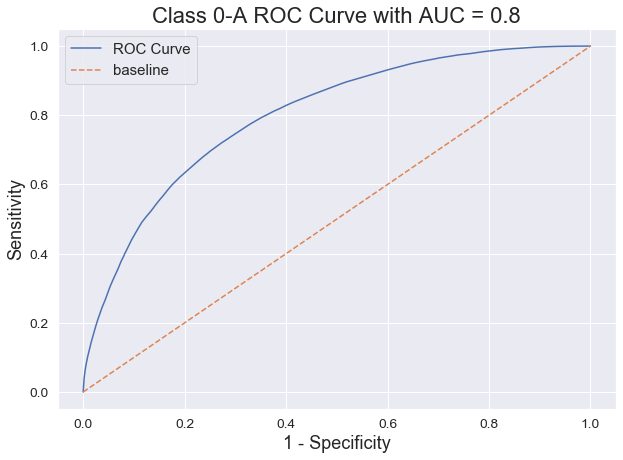

In [167]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_0', '0', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_0', '0', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 0-A ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_0"], dfprobs["0"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

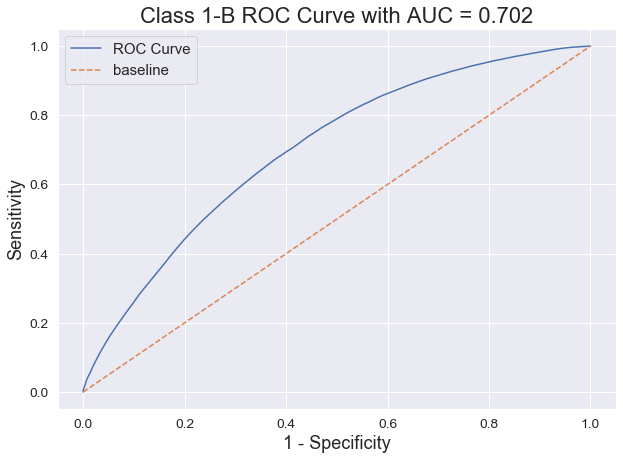

In [168]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_1', '1', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_1', '1', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 1-B ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_1"], dfprobs["1"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

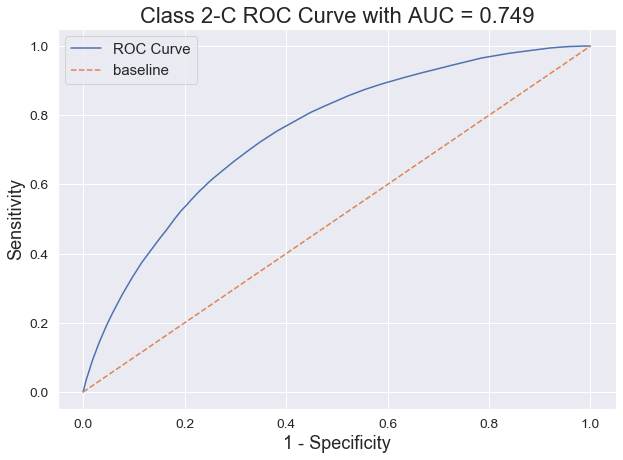

In [169]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_2', '2', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_2', '2', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 2-C ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_2"], dfprobs["2"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

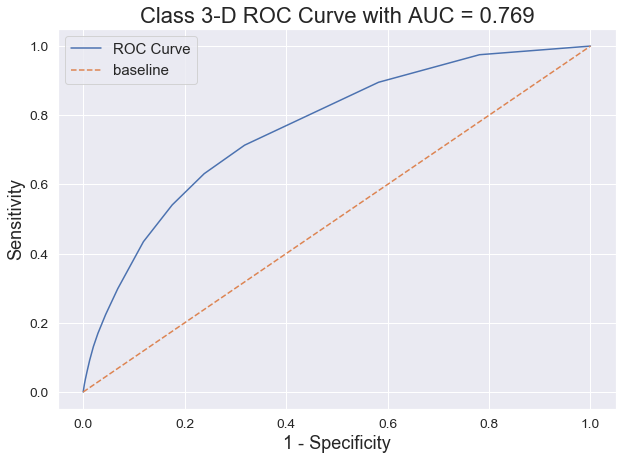

In [170]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_3', '3', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_3', '3', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 3-D ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_3"], dfprobs["3"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

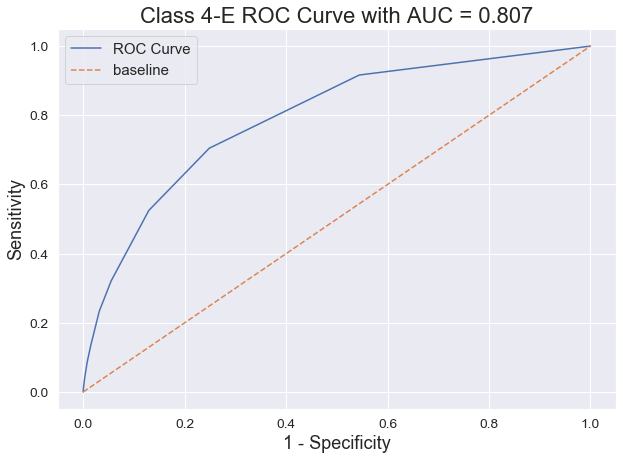

In [171]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_4', '4', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_4', '4', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 4-E ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_4"], dfprobs["4"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

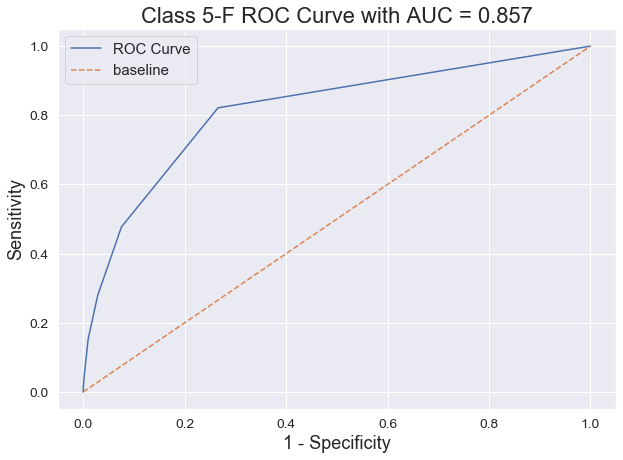

In [172]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_5', '5', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_5', '5', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 5-F ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_5"], dfprobs["5"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

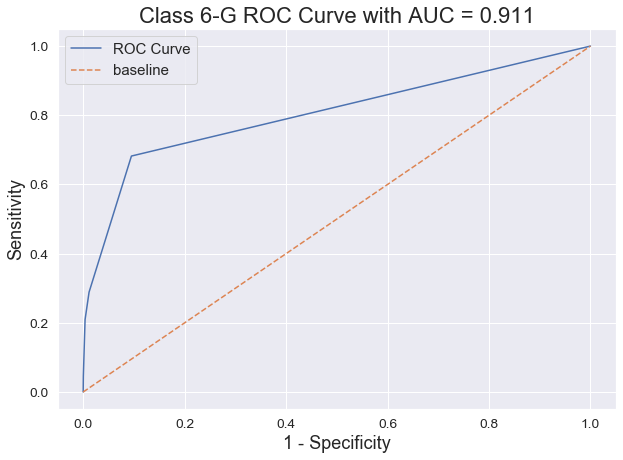

In [173]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(dfprobs, 'act_6', '6', prob) for prob in thresholds]
fpr_values = [FPR(dfprobs, 'act_6', '6', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Class 6-G ROC Curve with AUC = {round(roc_auc_score(dfprobs["act_6"], dfprobs["6"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=15);

<div style="text-align: right">(<a href="#contents">home</a>) </div>